#### importing all the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'D:\Programming\Udemy\1..Flight_Price--_ Machine Learning\Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [5]:
#### as we have 1 missing value , I can directly drop these
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data_copy=data.copy()
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp bcz our 
model will not be able to understand these string values,it just understand Time-stamp..

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [8]:
#changing date of jounry to time  by the function
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])
    
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [9]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### Feature Engineering of "Date_of_Journey" & fetch day,month,year

In [10]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [11]:
data['journey_month']=data['Date_of_Journey'].dt.month
data['journey_year']=data['Date_of_Journey'].dt.year
data['journey_day']=data['Date_of_Journey'].dt.day

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-26 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-26 05:50:00,2022-09-26 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-26 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,2019,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-09-26 18:05:00,2022-09-26 23:30:00,5h 25m,1 stop,No info,6218,12,2019,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-09-26 16:50:00,2022-09-26 21:35:00,4h 45m,1 stop,No info,13302,1,2019,3


#### try to clean Dep_Time & Arrival_Time & featurize it..¶

In [13]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

extract_hour_min(data,'Dep_Time')
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15


#### lets analyse when will most of the flights will take-off

In [14]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Afternoon '
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late night'

<AxesSubplot:>

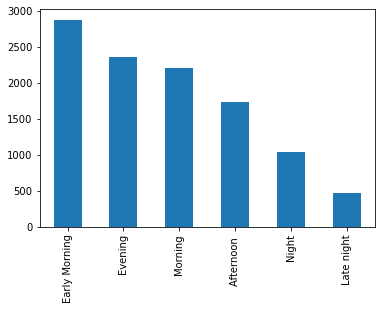

In [15]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [16]:
data.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,2019,4,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,2019,27,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,4,2019,27,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,2019,3,11,30,14,10
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,2019,5,10,55,19,15


In [17]:
# hour to minutes
def preprocess_duration(x) :
    if 'h' not in x :
        x='0h '+x
    elif 'm' not in x :
        x=x+ ' 0m'
    return x

In [18]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [19]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [20]:
data['Duration_minutes']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,16,50,21,35,4,45


#### Analyse whether duration impacts on price or not!

In [22]:
# Eval is calculation
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [23]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,16,50,21,35,4,45,285


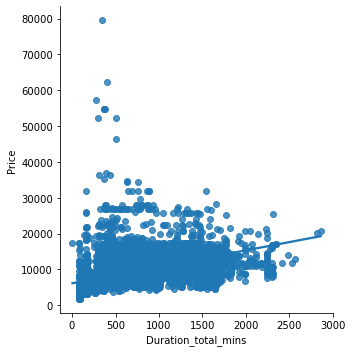

In [24]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

#### City with maximum final destinations of flights

In [25]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

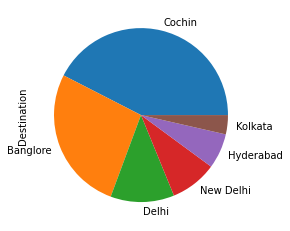

In [26]:
data['Destination'].value_counts().plot(kind='pie')

#### On which route Jet airways is extremely used

In [27]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [28]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### Airline vs Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

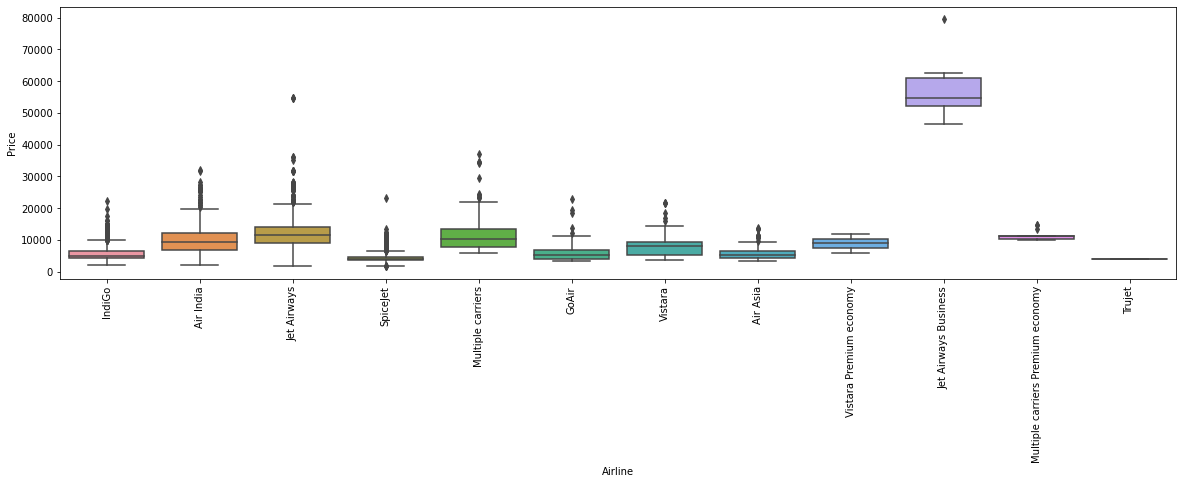

In [29]:
plt.figure(figsize=(20,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

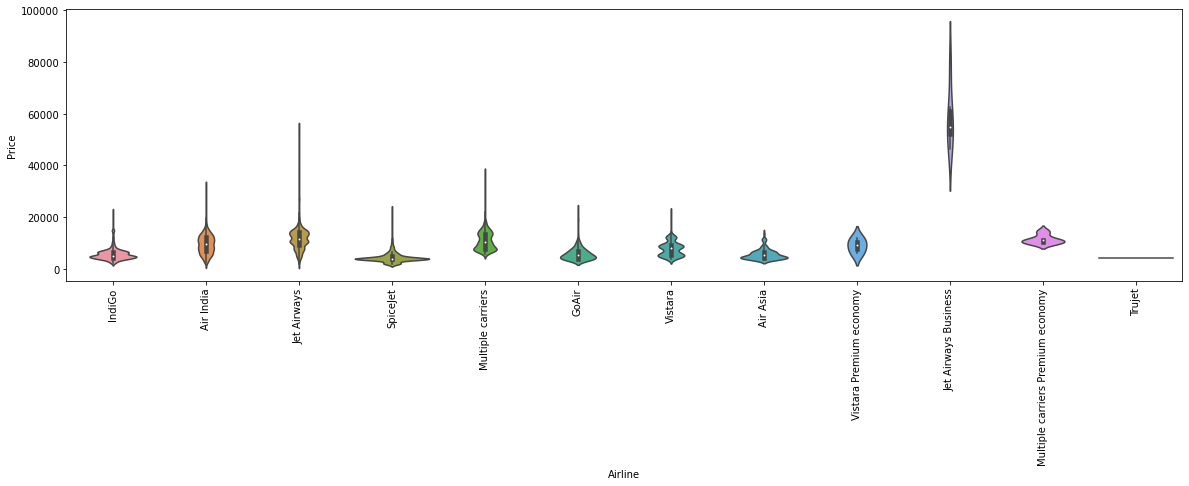

In [30]:
plt.figure(figsize=(20,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

#### One Hot encoding

In [31]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [32]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [33]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [34]:
# Categorial columns
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [35]:
# Numerical columns
num_col=[col for col in data.columns if data[col].dtype!='object']

In [36]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [37]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [38]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [39]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


#### Performing target guided encoding on data (Manual Encoding)

In [40]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [41]:
#Dictionary 
dict1={key:index for index,key in enumerate(airlines,0)}

In [42]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [43]:
data['Airline']=data['Airline'].map(dict1)

In [44]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [45]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [46]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [47]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [48]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [49]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [50]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [51]:
dict2={key:index for index,key in enumerate(dest,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [52]:
data['Destination']=data['Destination'].map(dict2)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [53]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-09-06,Delhi,4,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [54]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


In [56]:
data['Total_Stops']=data['Total_Stops'].map(stops)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [57]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,2h 50m,0,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-09-06,Delhi,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2019-01-03,Banglore,2,4h 45m,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


#### Outlier detection

In [58]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Users\MANOJ KUMAR DARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MANOJ KUMAR DARA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MANOJ KUMAR DARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-le

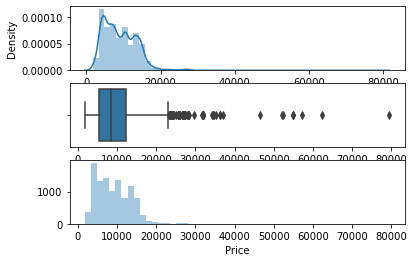

In [59]:
plot(data,"Price")

In [60]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\MANOJ KUMAR DARA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MANOJ KUMAR DARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


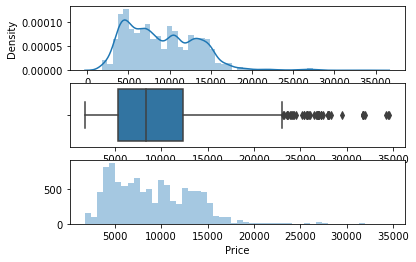

In [61]:
plot(data,'Price')

#### Feature selection

In [62]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,2h 50m,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-09-06,Delhi,4,19h 0m,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,5h 25m,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2019-01-03,Banglore,2,4h 45m,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [63]:
data.drop(columns=['Source','Duration','Date_of_Journey'],axis=1,inplace=True)

In [64]:
data.head(5)

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [65]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_month            int64
journey_day              int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [66]:
from sklearn.feature_selection import mutual_info_regression

In [67]:
X=data.drop(['Price'],axis=1)

In [68]:
y=data['Price']

In [69]:
mutual_info_regression(X,y)

array([0.97301596, 1.00614762, 0.78774542, 0.23345709, 0.19971441,
       0.33357976, 0.25566327, 0.40227064, 0.34953617, 0.46470973,
       0.34595203, 0.3870275 , 0.45799012, 0.51773107, 0.12974457,
       0.20478597])

In [70]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']


In [71]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.015153
Airline,0.980623
Total_Stops,0.788229
Source_Delhi,0.518930
Duration_hours,0.464213
Source_Kolkata,0.453645
Arrival_Time_hour,0.402637
Source_Banglore,0.385259
Arrival_Time_minute,0.357410
Dep_Time_hour,0.348242


#### Build the ML model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [74]:
ml_model= RandomForestRegressor()
model=ml_model.fit(X_train,y_train)

In [75]:
y_pred=model.predict(X_test)
y_pred


array([16744.87,  6483.63,  8767.25, ...,  3509.44,  6226.47,  7219.78])

In [76]:
# Saving ML
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [77]:
import pickle

In [78]:
file = open(r'C:\Users\MANOJ KUMAR DARA\Udemy/rf_random.pkl','wb')

In [79]:
pickle.dump(model,file)

In [80]:
model = open(r'C:\Users\MANOJ KUMAR DARA\Udemy/rf_random.pkl','rb')
forest=pickle.load(model)
forest.predict(X_test)

array([16744.87,  6483.63,  8767.25, ...,  3509.44,  6226.47,  7219.78])

#### Defining the Evaluation metric

In [83]:
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    # absolute
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [84]:
mape(y_test,forest.predict(X_test))

13.21987907796551

In [89]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score :{}'.format(model.score(X_train,y_train)))
    y_prediction =model.predict(X_test)
    print('Precitions are : {}'.format(y_prediction))
    print('/n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2_score :{}'.format(r2_score))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE:',mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training score :0.9514551685898052
Precitions are : [16765.73  6395.67  8889.45 ...  3536.04  6366.12  6916.41]
/n
r2_score :0.8064760227864962
MSE: 3767447.314054317
MAE: 1186.56949530957
RMSE: 1940.991322508763
MAPE: 13.290105243516523


C:\Users\MANOJ KUMAR DARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


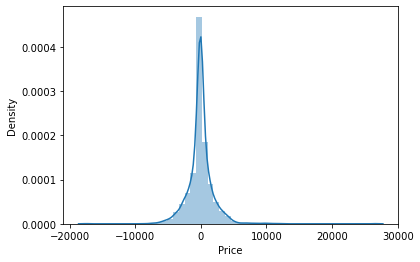

In [90]:
predict(RandomForestRegressor())